In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
raw_data = pd.read_csv('C:/Users/KOPPINEEDI CHAITU/OneDrive/Desktop/New folder/Country.csv', index_col=0)
raw_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [15]:
print(raw_data.shape)

(167, 9)


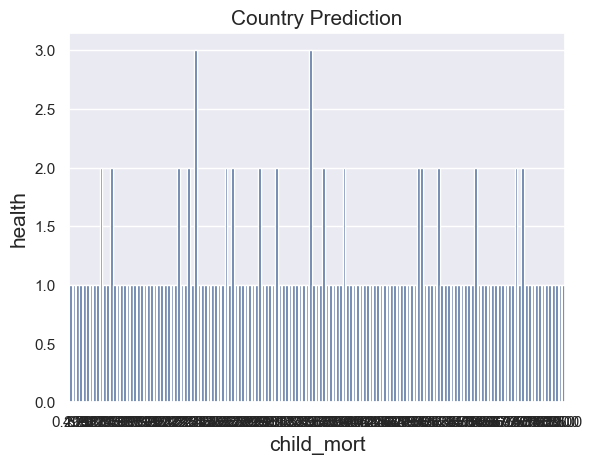

In [19]:
# use 'countplot' to plot barplot for orders
sns.countplot(data = raw_data, x = 'exports')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Country Prediction', fontsize = 15)
plt.xlabel('child_mort', fontsize = 15)
plt.ylabel('health', fontsize = 15)

plt.show()

In [31]:
raw_data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


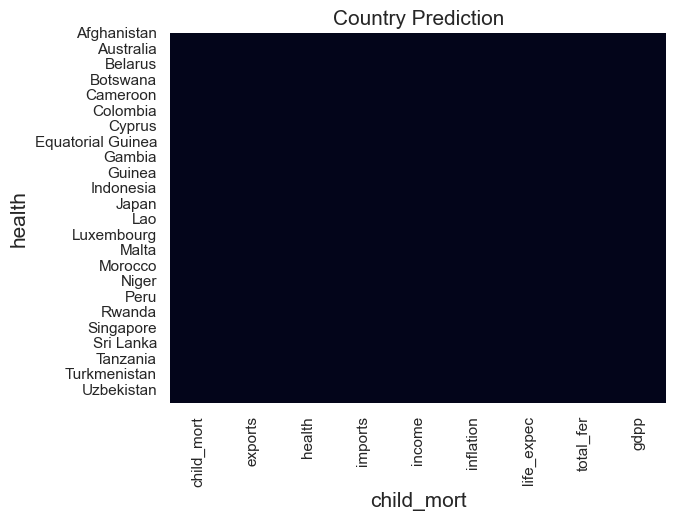

In [35]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(raw_data.isnull(), cbar=False)
plt.title('Country Prediction', fontsize = 15)
plt.xlabel('child_mort', fontsize = 15)
plt.ylabel('health', fontsize = 15)

plt.show()

In [37]:
# create dummies against 'health'
data = pd.get_dummies(raw_data,columns=['health'])     

# head() to display top five rows
data.head()

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,health_1.81,health_1.97,...,health_11.3,health_11.4,health_11.5,health_11.6,health_11.7,health_11.8,health_11.9,health_13.1,health_14.2,health_17.9
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,5.82,553,False,False,...,False,False,False,False,False,False,False,False,False,False
Albania,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090,False,False,...,False,False,False,False,False,False,False,False,False,False
Algeria,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460,False,False,...,False,False,False,False,False,False,False,False,False,False
Angola,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530,False,False,...,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
data.shape

(167, 155)

In [41]:
data.isnull().sum()

child_mort     0
exports        0
imports        0
income         0
inflation      0
              ..
health_11.8    0
health_11.9    0
health_13.1    0
health_14.2    0
health_17.9    0
Length: 155, dtype: int64

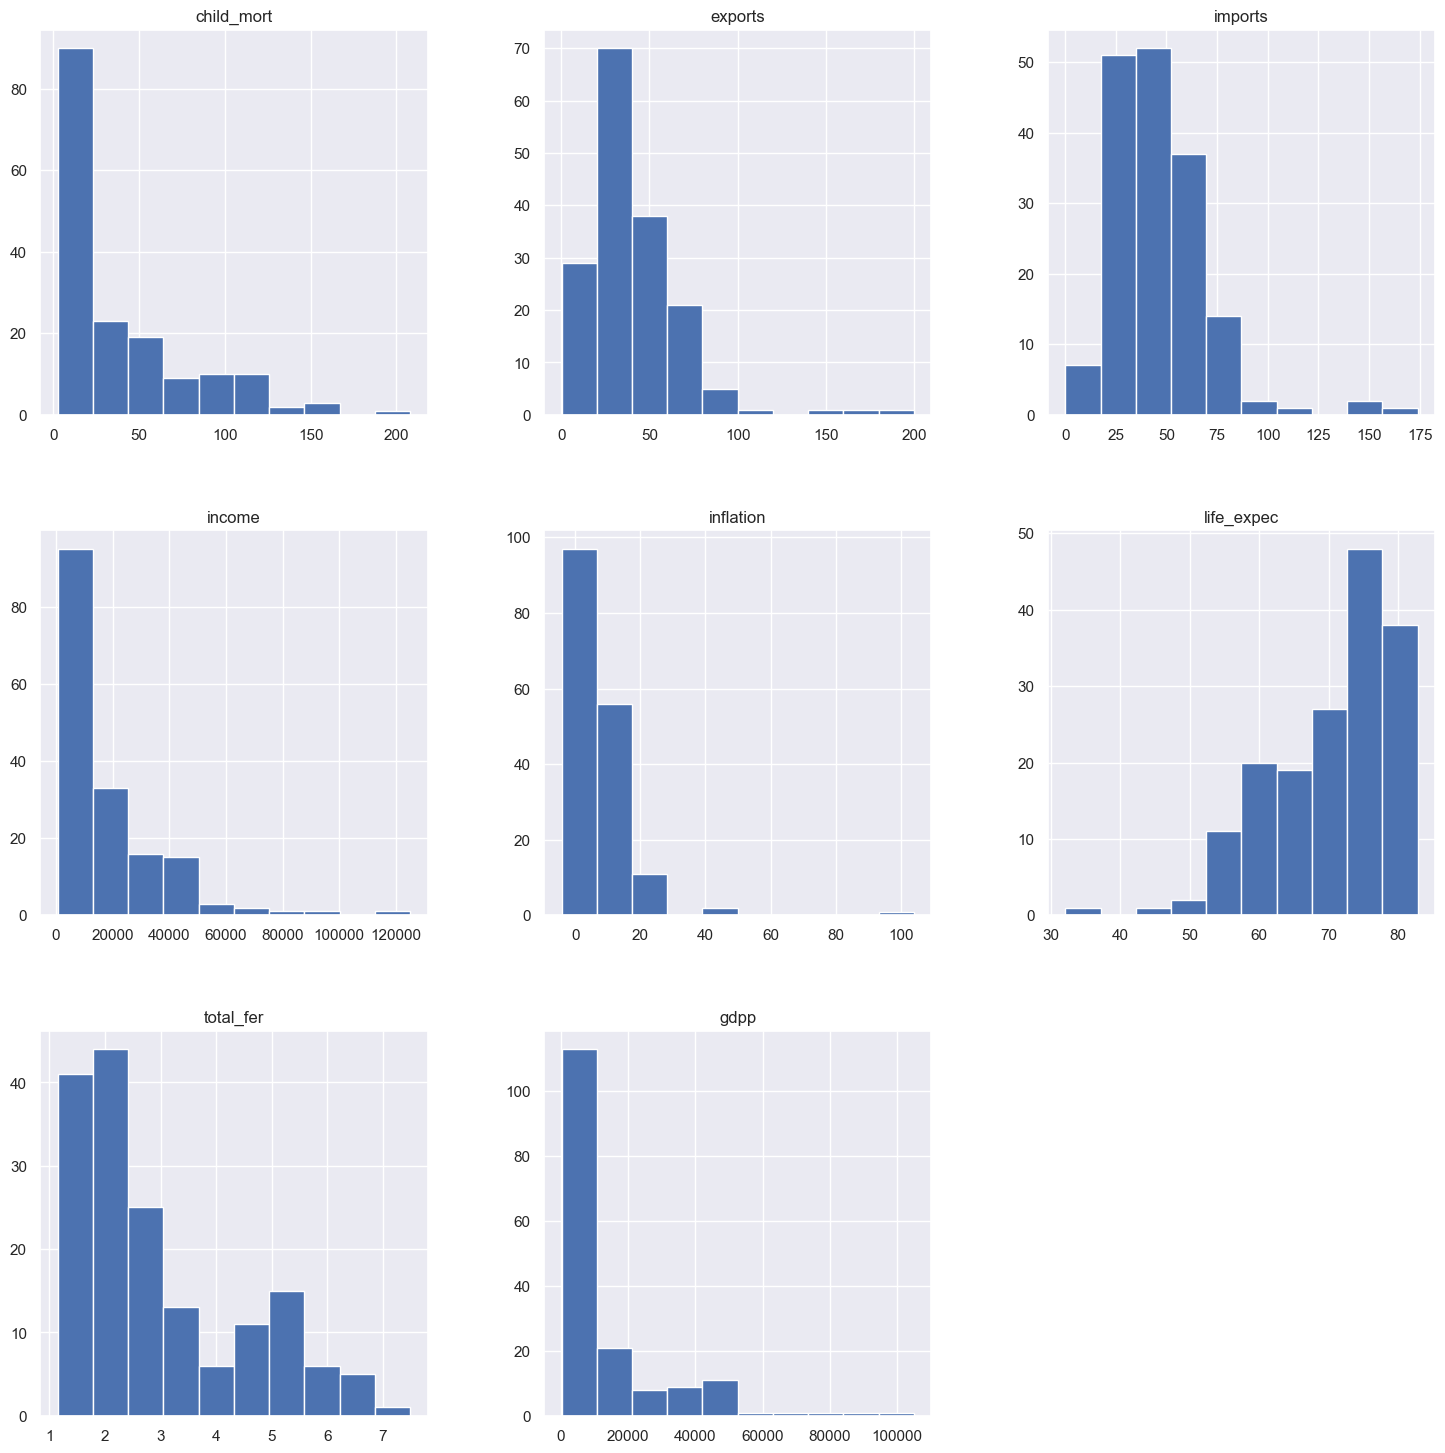

In [43]:
fig = data.hist(figsize = (18,18))

In [51]:
features = data.drop(['child_mort', 'income', 'gdpp'], axis=1)
features.head()

,exports,imports,inflation,life_expec,total_fer,health_1.81,health_1.97,health_2.2,health_2.46,health_2.5,...,health_11.3,health_11.4,health_11.5,health_11.6,health_11.7,health_11.8,health_11.9,health_13.1,health_14.2,health_17.9
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10.0,44.9,9.44,56.2,5.82,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Albania,28.0,48.6,4.49,76.3,1.65,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Algeria,38.4,31.4,16.10,76.5,2.89,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angola,62.3,42.9,22.40,60.1,6.16,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,45.5,58.9,1.44,76.8,2.13,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(features) 
features = scale.transform(features)                
features_scaled = pd.DataFrame( features, columns= data.columns[1:153])
features_scaled.head()

,exports,imports,income,inflation,life_expec,total_fer,gdpp,health_1.81,health_1.97,health_2.2,...,health_11.0,health_11.1,health_11.3,health_11.4,health_11.5,health_11.6,health_11.7,health_11.8,health_11.9,health_13.1
0,-1.138280,-0.082455,0.157336,-1.619092,1.902882,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615
1,-0.479658,0.070837,-0.312347,0.647866,-0.859973,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615
2,-0.099122,-0.641762,0.789274,0.670423,-0.038404,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615
3,0.775381,-0.165315,1.387054,-1.179234,2.128151,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615
4,0.160668,0.497568,-0.601749,0.704258,-0.541946,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615


In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [4, 5, 6, 7, 8]
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

C:\Users\KOPPINEEDI CHAITU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, silhouette score is -0.09947644807437421)


C:\Users\KOPPINEEDI CHAITU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, silhouette score is -0.0986136778064182)


C:\Users\KOPPINEEDI CHAITU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, silhouette score is -0.0898967120575487)


C:\Users\KOPPINEEDI CHAITU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7, silhouette score is -0.08441158632274731)


C:\Users\KOPPINEEDI CHAITU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8, silhouette score is -0.08278309787977838)


In [78]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4, random_state= 10)

# fit the model
model.fit(features_scaled)

C:\Users\KOPPINEEDI CHAITU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [80]:
data_output = data.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,health_1.81,health_1.97,...,health_11.4,health_11.5,health_11.6,health_11.7,health_11.8,health_11.9,health_13.1,health_14.2,health_17.9,Cluster
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,5.82,553,False,False,...,False,False,False,False,False,False,False,False,False,1
Albania,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090,False,False,...,False,False,False,False,False,False,False,False,False,1
Algeria,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460,False,False,...,False,False,False,False,False,False,False,False,False,1
Angola,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530,False,False,...,False,False,False,False,False,False,False,False,False,1
Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200,False,False,...,False,False,False,False,False,False,False,False,False,1


In [82]:
np.unique(model.labels_, return_counts=True)   

(array([0, 1, 2, 3]), array([  3, 161,   2,   1], dtype=int64))

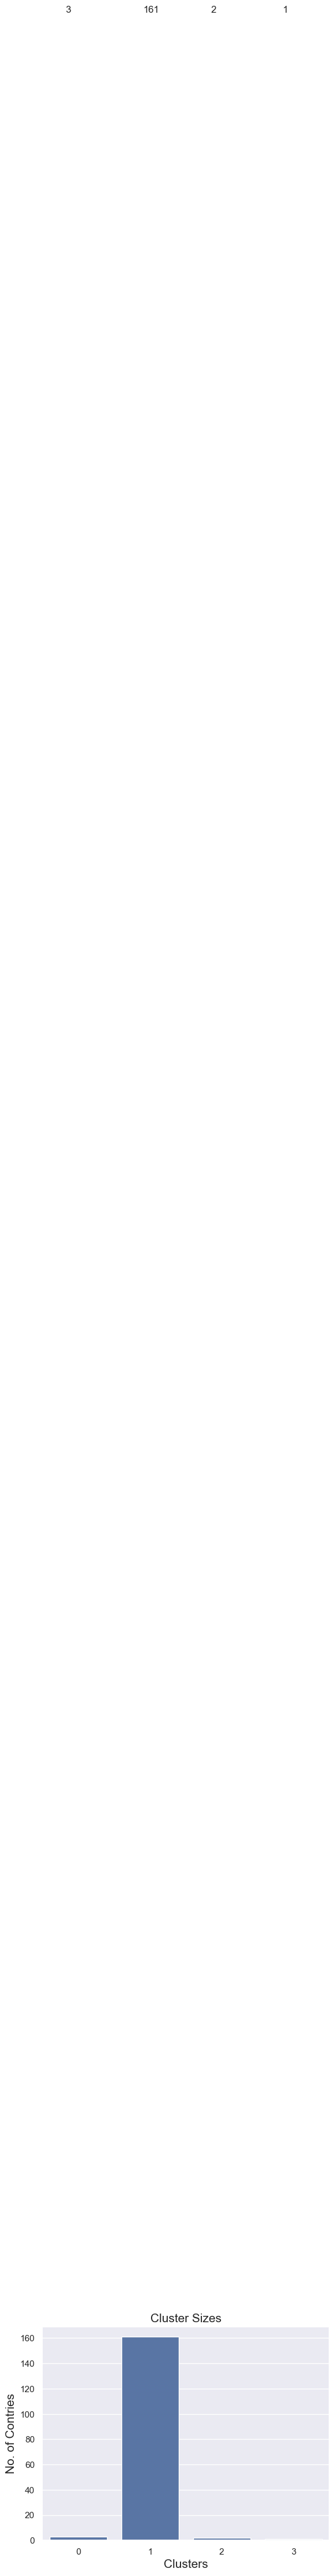

In [147]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Contries', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

In [149]:
centers = pd.DataFrame(model.cluster_centers_, columns=  data_output.columns[1:153])      

In [151]:
# head() to display top five rows
centers.head()

,exports,imports,income,inflation,life_expec,total_fer,gdpp,health_1.81,health_1.97,health_2.2,...,health_11.0,health_11.1,health_11.3,health_11.4,health_11.5,health_11.6,health_11.7,health_11.8,health_11.9,health_13.1
0,-0.051555,-0.833722,3.711751,-0.288241,0.564521,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615
1,0.003149,0.007756,-0.072342,0.009481,-0.001738,0.002892,0.002892,0.002892,0.002892,0.002892,...,0.004103,0.002892,0.002892,0.004103,0.002892,0.002892,0.004103,0.002892,0.002892,0.002892
2,-0.364400,0.261416,-0.091264,-0.322076,-0.223920,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615
3,0.376549,0.729576,0.694389,-0.017559,-0.965982,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,...,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.110096,-0.077615,-0.077615,-0.077615


In [153]:
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]     

In [155]:
np.unique(model.labels_, return_counts=True)[1][0]

3

In [157]:
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0     health_4.1
1         income
2    health_4.97
3     life_expec
4        exports
5    health_8.55
6    health_7.77
7    health_5.86
8    health_4.29
9    health_7.91
Name: 1, dtype: object

In [159]:
data_output[['imports', 'exports', 'income','total_fer']][data_output.Cluster == 0].describe()

,imports,exports,income,total_fer
count,3.000000,3.000000,3.000000,3.000000
mean,26.766667,39.700000,23550.000000,3.800000
std,8.258531,12.759702,20345.576915,1.775838
min,17.400000,25.300000,5150.000000,2.600000
25%,23.650000,34.750000,12625.000000,2.780000
50%,29.900000,44.200000,20100.000000,2.960000
75%,31.450000,46.900000,32750.000000,4.400000
max,33.000000,49.600000,45400.000000,5.840000


In [161]:
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]     

In [163]:
np.unique(model.labels_, return_counts=True)[1][1]

161

In [164]:
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var  

0      inflation
1        imports
2    health_5.16
3    health_3.66
4    health_10.9
5    health_8.94
6    health_8.04
7    health_10.7
8    health_11.0
9    health_5.21
Name: 1, dtype: object

In [167]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['imports', 'exports', 'income','total_fer']][data_output.Cluster == 1].describe()

,imports,exports,income,total_fer
count,161.000000,161.000000,161.000000,161.000000
mean,47.077428,41.195025,17157.844720,2.945342
std,24.433101,27.845812,19447.925971,1.518643
min,0.065900,0.109000,609.000000,1.150000
25%,30.400000,23.500000,3320.000000,1.790000
50%,43.300000,35.000000,9960.000000,2.380000
75%,58.900000,51.400000,22900.000000,3.910000
max,174.000000,200.000000,125000.000000,7.490000


In [168]:
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse = True)[:10]   

In [171]:
np.unique(model.labels_, return_counts=True)[1][2]

2

In [172]:
# retrieve the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var 

0     health_4.4
1        imports
2    health_8.55
3    health_7.91
4    health_7.77
5    health_7.72
6    health_7.33
7    health_7.03
8    health_7.01
9    health_6.93
Name: 1, dtype: object

In [174]:
data_output[['imports', 'exports', 'income','total_fer']][data_output.Cluster == 2].describe()

,imports,exports,income,total_fer
count,2.000000,2.000000,2.00000,2.000000
mean,53.200000,31.150000,6950.00000,2.610000
std,5.515433,6.010408,4200.21428,0.763675
min,49.300000,26.900000,3980.00000,2.070000
25%,51.250000,29.025000,5465.00000,2.340000
50%,53.200000,31.150000,6950.00000,2.610000
75%,55.150000,33.275000,8435.00000,2.880000
max,57.100000,35.400000,9920.00000,3.150000


In [176]:
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]   

In [177]:
np.unique(model.labels_, return_counts=True)[1][3]

1

In [180]:
# retrieve the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var    

0    health_5.58
1        imports
2         income
3        exports
4      inflation
5    health_8.55
6    health_7.91
7    health_7.77
8    health_7.72
9    health_7.33
Name: 1, dtype: object

In [183]:
data_output[['imports', 'exports', 'income','total_fer']][data_output.Cluster==3].describe()

,imports,exports,income,total_fer
count,1.0,1.0,1.0,1.00
mean,64.5,51.4,16200.0,1.49
std,NaN,NaN,NaN,NaN
min,64.5,51.4,16200.0,1.49
25%,64.5,51.4,16200.0,1.49
50%,64.5,51.4,16200.0,1.49
75%,64.5,51.4,16200.0,1.49
max,64.5,51.4,16200.0,1.49
